# Taller 3

Integrantes:
* Oscar Javier Ángel Balcázar
* Rafael Camilo Tejon Rojas
* Juan Sebastian Alvarez Eraso

# Enunciado

Una empresa del sector farmacéutico desea utilizar la información que posee de sus empleados para estimar el nivel de satisfacción laboral que puedan tener en algún momento y usarlo como insumo para detectar posibles fugas de personal. El CEO de la farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel de satisfacción laboral de sus empleados y evitar futuras fugas de personal.

A continuación, se describe el diccionario de datos del dataset con el cual se debe conducir el análisis:

| Field | Description |
|---------|--------------|
| Age | Age of the employee |
| Attrition | Employee attrition |
| BusinessTravel | How frequently an employee travels for business purpose |
| DailyRate | Daily wage of an employee |
| Department | Employee department |
| DistanceFromHome | Distance from home to office in KM's |
| Education | Qualification of employee (masked, higher is better) |
| EducationField | Stream of Education |
| EmployeeCount | EmployeeCount |
| EmployeeNumber | Employee number |
| EnvironmentSatisfaction | Environment (higher is better) |
| Gender | Gender of employee |
| HourlyRate | Employee hourly rate |
| JobInvolvement | Job involvement (higher is better) |
| JobLevel | Level of Job (higher is more important) |
| JobRole | Job role of an employee |
| JobSatisfaction | If employee is satisfied? |
| MaritalStatus | Employee is married or not |
| MonthlyIncome | Income of an employee |
| MonthlyRate | Monthly rate of an employee |
| NumCompaniesWorked | Number of companies worked for |
| Over18 | Age over 18 |
| OverTime | Employee works over time |
| PercentSalaryHike | Salary hike |
| PerformanceRating | Performance rate |
| RelationshipSatisfaction | Relationship satisfaction |
| StandardHours | Per week standard work hours |
| StockOptionLevel | Company stock option level |
| TotalWorkingYears | Total working years |
| TrainingTimesLastYears | Training time |
| WorkLifeBalance | Work life balance |
| YearsAtCompany | Total years at current company |
| YearsInCurrentRole | Total years in current role |
| YearsSinceLastPromotion | Years since last promotion |
| YearsWithCurrManager | Years worked under current manager |

# Actividades

## Setup inicial

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 133 kB/s
     |████████████████████████████████| 102 kB 5.5 MB/s 
     |████████████████████████████████| 690 kB 36.6 MB/s 
     |████████████████████████████████| 62 kB 684 kB/s 
     |████████████████████████████████| 9.9 MB 27.8 MB/s 
     |████████████████████████████████| 4.7 MB 42.9 MB/s 
     |████████████████████████████████| 296 kB 41.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315268 sha256=b81fae49573c9d5ff95a5a8f4ca99c386d11369725372cc24bd8bb62e22f2f27
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7hkl9pc/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d9c0632ab3c9955c82dc2593787fbaf04383e8d71f20c196215282095a103fe3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import warnings

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Deshabilitar warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

## Limpieza y preparación de datos

In [ ]:
employee_df = pd.read_csv('https://raw.githubusercontent.com/juanalvarez123/MINE-4101-taller-3/main/Dataset/Data_Taller_3.csv', sep=';')
employee_df.head(10)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Fem,94,3,2,Sales Executive,Single,5993,19479,8,Y,Yes,11,3,1,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,Married,5130,24907,1,Y,No,23,4,4,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,3,2,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Fem,56,3,1,Research Scientist,Married,2909,23159,1,Y,Yes,11,3,3,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,Married,3468,16632,9,Y,No,12,3,4,80.0,1,6,3,3,2,2,2,2,0
5,4.0,32.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,Single,3068,11864,0,Y,No,13,3,3,80.0,0,8,2,2,7,7,3,6,0
6,1.0,59.0,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Fem,81,4,1,Laboratory Technician,Married,2670,9964,4,Y,Yes,20,4,1,80.0,3,12,3,2,1,0,0,0,0
7,3.0,30.0,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,Divorced,2693,13335,1,Y,No,22,4,2,80.0,1,1,2,3,1,0,0,0,0
8,3.0,38.0,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,Single,9526,8787,0,Y,No,21,4,2,80.0,0,10,2,3,9,7,1,8,0
9,3.0,36.0,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,Married,5237,16577,6,Y,No,13,3,2,80.0,2,17,3,2,7,7,7,7,0


In [ ]:
# Validación de nulos en cada una de las columnas del Dataframe.
employee_df.isnull().sum()

JobSatisfaction             12
Age                          3
Attrition                    1
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                7
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [ ]:
ProfileReport(employee_df)

De acuerdo al anterior Pandas Profile se realizaran algunos ajustes en los datos como: corrección de formatos y corrección de valores atípicos.

In [ ]:
# Validación de los valores de la columnda JobRole
employee_df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources',
       'Lab Tech', 'RH'], dtype=object)

In [ ]:
# Verificación de los datos se decide estandarizar RH a Human Resources.
emplolyee_temp = employee_df[(employee_df.JobRole == 'RH')]
emplolyee_temp.head(5)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
1039,3.0,34.0,Yes,Travel_Rarely,1107,Human Resources,9,4,Technical Degree,1,1040,1,female,52,3,1,RH,Married,2742,3072,1,Y,No,15,3,4,80.0,0,2,0,3,2,2,2,2,0
1064,3.0,30.0,No,Travel_Rarely,330,Human Resources,1,3,Life Sciences,1,1065,3,Male,46,3,1,RH,Divorced,2064,15428,0,Y,No,21,4,1,80.0,1,6,3,4,5,3,1,3,0
1107,3.0,38.0,No,Travel_Frequently,888,Human Resources,10,4,Human Resources,1,1108,3,Male,71,3,2,RH,Married,6077,14814,3,Y,No,11,3,3,80.0,0,10,2,3,6,3,1,2,0
1165,4.0,44.0,No,Travel_Frequently,602,Human Resources,1,5,Human Resources,1,1166,1,Male,37,3,2,RH,Married,5743,10503,4,Y,Yes,11,3,3,80.0,0,14,3,3,10,7,0,2,0
1200,4.0,44.0,No,Travel_Rarely,528,Human Resources,1,3,Life Sciences,1,1201,3,Female,44,3,1,RH,Divorced,3195,4167,4,Y,Yes,18,3,1,80.0,3,8,2,3,2,2,2,2,0


Se identificaron 17 registros que tienen en el dataset el JobRole como HR y todos los empleados con este rol pertecen al departamento de Human Resources 

In [ ]:
#Se realiza estandarización de los datos.
employee_df['JobRole'] = employee_df['JobRole'].str.replace('RH', 'Human Resources')

In [ ]:
# Validación de valores en la columna Gender
employee_df.Gender.unique()

array(['Fem', 'Male', 'man', 'Female', 'female'], dtype=object)

In [ ]:
#Se realiza estandarización de los datos.
employee_df['Gender'] = employee_df['Gender'].str.replace('Female', 'F')
employee_df['Gender'] = employee_df['Gender'].str.replace('female', 'F')
employee_df['Gender'] = employee_df['Gender'].str.replace('Fem', 'F')
employee_df['Gender'] = employee_df['Gender'].str.replace('Male', 'M')
employee_df['Gender'] = employee_df['Gender'].str.replace('man', 'M')

In [ ]:
# Validación de los valores de la columna MaritalStatus
employee_df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced', 'S', 'D', 'M'], dtype=object)

In [ ]:
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace('Single', 'S')
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace('Divorced', 'D')
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace('Married', 'M')

employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace( 'S','Single')
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace('D', 'Divorced')
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].str.replace('M', 'Married')

In [ ]:
# De acuerdo a una de las Alertas que muestra el reporte de PandasProfile la columna Over18 es una constante, por lo cual se elimina
employee_df.Over18.unique()

array(['Y'], dtype=object)

In [ ]:
# Se elimina columna constante
employee_df = employee_df.drop(['Over18'], axis=1)

In [ ]:
# Se identificó tambien la variable StandardHours como constante.
employee_df.StandardHours.unique()

array([80., nan])

In [ ]:
# Se elimina variable constante
employee_df = employee_df.drop(['StandardHours'], axis=1)

In [ ]:
# El 99% de los valores de la columna EmployeeCount son constantes por lo cual tambien se elimina.
employee_df = employee_df.drop(['EmployeeCount'], axis=1)

Por medio de los valores máximos y mínimos visualizados en el reporte de Pandas Profile se identificaron los siguientes outliers

In [ ]:
# Validación en la columna edad 
employee_df['Age'].agg(['min', 'max'])

min      3.0
max    200.0
Name: Age, dtype: float64

In [ ]:
emplolyee_temp = employee_df[(employee_df.Age < 18) | (employee_df.Age > 60)]
emplolyee_temp

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
149,2.0,190.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,150,2,F,79,3,1,Laboratory Technician,Single,1483,16102,1,No,14,3,4,0,1,3,3,1,0,0,0,0
511,2.0,3.0,No,Travel_Rarely,913,Research & Development,9,2,Medical,512,2,M,48,2,2,Manufacturing Director,Divorced,8847,13934,2,Yes,11,3,3,1,13,2,3,3,2,0,2,0
958,4.0,3.0,No,Travel_Rarely,943,Research & Development,9,3,Life Sciences,959,4,M,86,3,3,Healthcare Representative,Divorced,8500,5494,0,No,11,3,4,1,10,0,2,9,7,1,6,0
1485,4.0,200.0,No,Travel_Rarely,391,Research & Development,16,2,Life Sciences,1486,3,M,96,3,1,Research Scientist,Single,1232,19281,1,No,14,3,4,0,0,6,3,0,0,0,0,0


Para los empleados con valores de 190 y 200 en la edad de imputaron valores de 19 y 20 años respectivamente ya que al verificar la columna TotalWorkingYears el primer empleado tiene un año y el segundo 0 años.

In [ ]:
employee_df.loc[employee_df['EmployeeNumber'] == 150, ['Age']] = 19
employee_df.loc[employee_df['EmployeeNumber'] == 1486, ['Age']] = 20

Para los empleados con valores de 3.0 en la edad de imputaron valores de 30 años, ya que al verificar la columna TotalWorkingYears el primer empleado tiene 13 y 10 años de trabajo, suponiendo que iniciaron trabajando a los 18 años es probable una edad de 30 años.

In [ ]:
employee_df.loc[employee_df['EmployeeNumber'] == 512, ['Age']] = 30
employee_df.loc[employee_df['EmployeeNumber'] == 959, ['Age']] = 30

Validación de la variable MonthyIncome

In [ ]:
employee_df['MonthlyIncome'].agg(['min', 'max'])

min         25
max    9907000
Name: MonthlyIncome, dtype: int64

In [ ]:
emplolyee_temp = employee_df[(employee_df.MonthlyIncome < 1000) | (employee_df.MonthlyIncome > 20000)]
emplolyee_temp

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
72,2.0,31.0,No,Travel_Rarely,1082,Research & Development,1,4,Medical,73,3,M,87,3,1,Research Scientist,Single,25,18775,1,No,17,3,2,0,1,4,3,1,1,1,0,0
974,4.0,27.0,No,Travel_Frequently,793,Sales,2,1,Life Sciences,975,4,M,43,1,2,Sales Executive,Single,50,20392,3,No,20,4,2,0,8,3,3,6,2,0,0,0
1326,2.0,32.0,Yes,Travel_Rarely,414,Sales,2,4,Marketing,1327,3,M,82,2,2,Sales Executive,Single,9907000,26186,7,Yes,12,3,3,0,7,3,2,2,2,2,2,0


Se realizó imputación de valores de acuerdo a la moda del rol.

In [ ]:
# Se obtiene la moda por el rol del trabajo
emplolyee_temp_df = employee_df[(employee_df.JobRole == 'Research Scientist')]
emplolyee_temp_df['MonthlyIncome'].mode()

0    2342
1    2911
dtype: int64

In [ ]:
# Se realiza imputación de valores
employee_df.loc[employee_df['EmployeeNumber'] == 73, ['MonthlyIncome']] = 2342

In [ ]:
# Se obtiene la moda por el rol del trabajo
emplolyee_temp_df = employee_df[(employee_df.JobRole == 'Sales Executive')]
emplolyee_temp_df['MonthlyIncome'].mode()[0]

4639

In [ ]:
# Se realiza imputación de valores
employee_df.loc[employee_df['EmployeeNumber'] == 975, ['MonthlyIncome']] = 4639
employee_df.loc[employee_df['EmployeeNumber'] == 1327, ['MonthlyIncome']] = 4639

Se realiza validación de la variable YearsAtCompany 

In [ ]:
employee_df['YearsAtCompany'].agg(['min', 'max'])

min      0
max    100
Name: YearsAtCompany, dtype: int64

In [ ]:
emplolyee_temp = employee_df[(employee_df.YearsAtCompany > 40)]
emplolyee_temp

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
503,4.0,34.0,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,504,2,M,42,3,1,Research Scientist,Married,2691,7660,1,No,12,3,4,1,10,4,2,100,9,8,8,0


Validación de Empleados con edad en NULL

In [ ]:
# Se obtiene loss registros de empleados con edad null
emplolyee_age_df = employee_df[(employee_df['Age'].isnull())]
emplolyee_age_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,M,40,3,1,Laboratory Technician,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,978,1,F,92,2,1,Research Scientist,Divorced,2029,15891,1,No,20,4,3,3,5,2,3,5,4,0,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1341,2,F,63,2,2,Sales Executive,Married,5673,6060,1,Yes,13,3,1,1,10,4,3,10,9,1,7,0


Para cada uno de los empleados se calculó la moda de acuerdo al JobRole y al Género

In [ ]:
emplolyee_temp = employee_df[(employee_df.JobRole == 'Laboratory Technician') & (employee_df.Gender == 'M')]
emplolyee_temp['Age'].mode()[0]

30.0

Se imputa el valor de la edad:

In [ ]:
# Se realiza imputación de valor para el primer empelado analizado
employee_df.loc[employee_df['EmployeeNumber'] == 5, ['Age']] = 30

Se valida el siguiente empleado

In [ ]:
emplolyee_temp = employee_df[(employee_df.JobRole == 'Research Scientist') & (employee_df.Gender == 'F')]
emplolyee_temp['Age'].mode()[0]

32.0

In [ ]:
# Se realiza imputación de valor para el primer empelado analizado
employee_df.loc[employee_df['EmployeeNumber'] == 978, ['Age']] = 32

Se valida el tercer empleado

In [ ]:
emplolyee_temp = employee_df[(employee_df.JobRole == 'Sales Executive') & (employee_df.Gender == 'F')]
emplolyee_temp['Age'].mode()[0]

34.0

In [ ]:
# Se realiza imputación de valor para el primer empelado analizado
employee_df.loc[employee_df['EmployeeNumber'] == 1341, ['Age']] = 34

In [ ]:
# Se elimina la variable EmployeeNumber ya que reprenta el código o número de empleado.
employee_df = employee_df.drop(['EmployeeNumber'], axis=1)

In [ ]:
# Se ajusta valor en la columna OverTime
employee_df.OverTime = employee_df.OverTime.replace('Na', 'No')

In [ ]:
# Se trabajan los valores de Attrition como numéricos
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

## Análisis exploratorio de datos y selección de features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

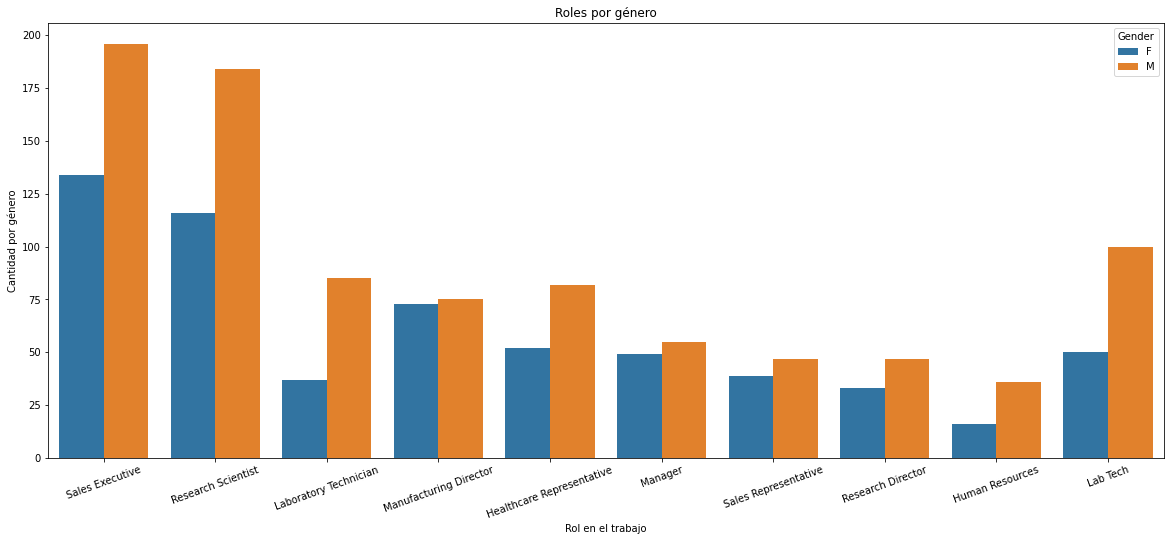

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'JobRole', data = employee_df, hue='Gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Roles por género')
ax.set_xlabel('Rol en el trabajo')
ax.set_ylabel('Cantidad por género')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.show()

Los roles donde están más desbalanceados los hombres versus las mujeres son 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Healthcare Representative' y 'Lab Tech'.

Para todos los roles se observa que hay más hombres que mujeres.

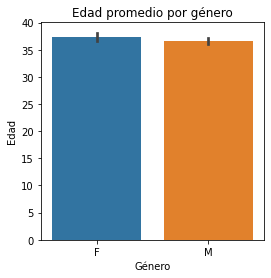

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.barplot(x = employee_df['Gender'], y = employee_df['Age'], estimator=np.mean)
ax.set_xlabel('Género')
ax.set_ylabel('Edad')
ax.set_title('Edad promedio por género')
plt.show()

El promedio de edad ronda los 35 años tanto para hombres como para mujeres y la varianza no es mucha.

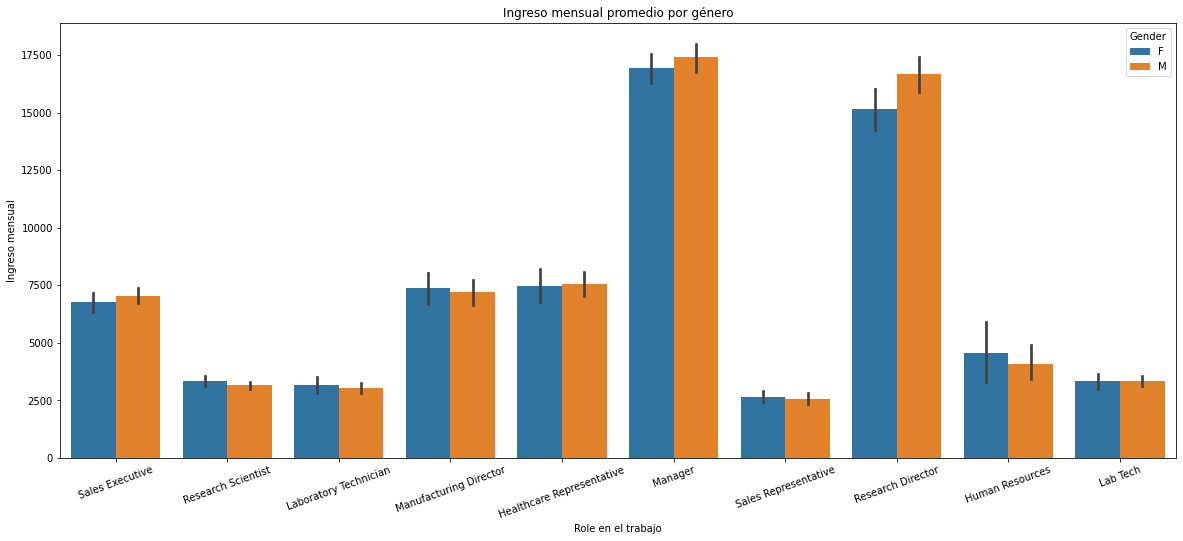

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = employee_df['JobRole'], y = employee_df['MonthlyIncome'], estimator=np.mean, hue=employee_df['Gender'])
ax.set_xlabel('Role en el trabajo')
ax.set_ylabel('Ingreso mensual')
ax.set_title('Ingreso mensual promedio por género')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.show()

Se puede ver que las diferencias más significativas en ingresos mensuales se dan para los 'Manager' y 'Research Director', aquí los hombres ganan en promedio más que las mujeres.

A diferencia de los roles anteriores, para 'Human Resources' y 'RH' las mujeres son las que más ganan y además hay una varianza significativa.

Para los demás roles no se ve una diferencia significativa.

In [ ]:
employee_df[['Attrition', 'WorkLifeBalance', 'MonthlyIncome', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobLevel', 'YearsInCurrentRole', 'YearsAtCompany','JobSatisfaction']].corr()

,Attrition,WorkLifeBalance,MonthlyIncome,DistanceFromHome,EnvironmentSatisfaction,JobLevel,YearsInCurrentRole,YearsAtCompany,JobSatisfaction
Attrition,1.000000,-0.065448,-0.166585,0.073690,-0.107450,-0.173041,-0.166486,-0.133806,-0.104160
WorkLifeBalance,-0.065448,1.000000,0.031002,-0.030884,0.031582,0.038299,0.045572,0.001569,-0.022694
MonthlyIncome,-0.166585,0.031002,1.000000,-0.019805,-0.005628,0.950703,0.372452,0.476373,-0.009925
DistanceFromHome,0.073690,-0.030884,-0.019805,1.000000,-0.014165,0.001254,0.016900,-0.004653,-0.000678
EnvironmentSatisfaction,-0.107450,0.031582,-0.005628,-0.014165,1.000000,0.003015,0.022633,-0.005295,-0.009773
JobLevel,-0.173041,0.038299,0.950703,0.001254,0.003015,1.000000,0.397059,0.492688,-0.004167
YearsInCurrentRole,-0.166486,0.045572,0.372452,0.016900,0.022633,0.397059,1.000000,0.718112,-0.003484
YearsAtCompany,-0.133806,0.001569,0.476373,-0.004653,-0.005295,0.492688,0.718112,1.000000,0.007356
JobSatisfaction,-0.104160,-0.022694,-0.009925,-0.000678,-0.009773,-0.004167,-0.003484,0.007356,1.000000


De los features anteriores y sus relaciones se puede concluir que **NO** hay correlación entre:
* El desgaste del empleado y el balance de vida.
* Los ingresos mensuales y la calidad de vida.
* El desgaste del empleado y la distancia de la casa a la oficina. Parece que a los empleados no les desgasta el tráfico de la ciudad.
* La satisfacción, el desgaste y el balance de vida.

Pero si existen unas correlaciones:
1. Correlación alta entre los ingresos mensuales y el nivel en el trabajo. Tiene sentido, entre más responsabilidades (importantes) tiene el empleado más gana.
2. Correlación alta entre los años en el role actual y los años en la empresa. Tiene sentido, un empleado pudo haber tenido solo un rol dentro de la empresa y ese mismo tiempo son los años que el empleado ha estado en la empresa.

Estos últimos serían feature a **NO** tener en cuenta en el modelo.

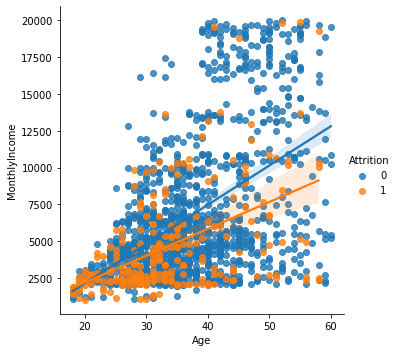

In [ ]:
sns.lmplot(x = 'Age', y = 'MonthlyIncome', data = employee_df , fit_reg=True, hue = 'Attrition')

Los empleados menores de 35 años y con ingresos de 3.000 USD mensuales tienen desgaste respecto a los demás empleados.

En contraste, los empleados con sueldos superiores a los 3.000 USD mensuales en su mayoría no tienen desgaste.

**¿Qué variables impactan en mayor nivel la satisfacción de los empleados?**

Attrition es la variable que más impactan la satisfacción, debido a que es la que más se correlaciona. Ninguna de las otras variables tienen una correlación muy clara con la variable objetivo.

**¿Qué variables parecen no ser relevantes para el análisis?**
En cuanto a las variables irrelevantes para el modelo, se elimino Over18, StandardHours y EmployeeCount porque tenian el mismo valor en la mayoria de filas. Ademas se eliminar EmployeeNumber, debido a que tenia valores diferentes para todas las filas.

## Categorización de variables

In [ ]:
# Debido a que hay textos con caracteres especiales, se eliminaran para facilitar el one hot encoding
def normalize_text(x):
  x = x.replace('&', 'and')
  x = x.replace(' ', '_')
  return x.lower()
normalize_text('Research & Development')

'research_and_development'

Para cada una de las variables categoricas, se convertiran a valores numericos que se puedan utilizar para entrenar el modelo.

In [ ]:
# Business Travel tiene un orden preestablecido, por lo que tiene sentido asignarle un valor a cada categoria.
employee_df.BusinessTravel = employee_df.BusinessTravel.replace('Non-Travel', 0)
employee_df.BusinessTravel = employee_df.BusinessTravel.replace('Travel_Rarely', 1)
employee_df.BusinessTravel = employee_df.BusinessTravel.replace('Travel_Frequently', 2)

# Debido a que es una variable binaria, se puede asignar 1 y -1 a las 2 categorias
employee_df.Gender = employee_df.Gender.replace('M', 1)
employee_df.Gender = employee_df.Gender.replace('F', -1)

# Al igual que Gender, Overtime es binario
employee_df.OverTime = employee_df.OverTime.replace('Yes', 1)
employee_df.OverTime = employee_df.OverTime.replace('No', -1)

# Las demas variables categoricas se normalizan para realizar un onehotencoding debido a que no se puede asumir un orden.
employee_df.Department = employee_df.Department.apply(normalize_text)

employee_df.EducationField = employee_df.EducationField.replace('Med', 'Medical')
employee_df.EducationField = employee_df.EducationField.apply(normalize_text)
employee_df.EducationField = employee_df.EducationField.replace('human_resources', 'human_resources_field')


employee_df.JobRole = employee_df.JobRole.apply(normalize_text)
employee_df.JobRole = employee_df.JobRole.replace('human_resources', 'human_resources_job')

employee_df.MaritalStatus = employee_df.MaritalStatus.apply(normalize_text)

employee_df.MaritalStatus.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [ ]:
employee_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,1,1,1102,sales,1,2,life_sciences,2,-1,94,3,2,sales_executive,single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,0,2,279,research_and_development,8,1,life_sciences,3,1,61,2,2,research_scientist,married,5130,24907,1,-1,23,4,4,1,10,3,3,10,7,1,7,0
2,3.0,37.0,1,1,1373,research_and_development,2,2,other,4,1,92,2,1,laboratory_technician,single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0
3,3.0,33.0,0,2,1392,research_and_development,3,4,life_sciences,4,-1,56,3,1,research_scientist,married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,2.0,30.0,0,1,591,research_and_development,2,1,medical,1,1,40,3,1,laboratory_technician,married,3468,16632,9,-1,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,0,0,845,sales,1,5,medical,4,-1,45,3,2,sales_executive,single,6653,15276,4,-1,15,3,2,0,7,6,3,1,0,0,0,0
1502,2.0,49.0,0,1,174,sales,8,4,technical_degree,4,1,56,2,4,sales_executive,married,13120,11879,6,-1,17,3,2,1,22,3,3,9,8,2,3,0
1503,1.0,27.0,0,1,1302,research_and_development,19,3,other,4,1,67,2,1,laboratory_technician,divorced,4066,16290,1,-1,11,3,1,2,7,3,3,7,7,0,7,0
1504,2.0,44.0,1,2,429,research_and_development,1,2,medical,3,1,99,3,1,research_scientist,divorced,2342,11092,1,1,12,3,3,3,6,2,2,5,3,2,3,0


In [ ]:
# Se realiza un OneHotEncoding sobre los valores del departamento
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(employee_df['Department'].values.reshape(-1,1))
print(list(enc.categories_[0]))
month_enc = enc.transform(employee_df['Department'].values.reshape(-1,1)).toarray()

['human_resources', 'research_and_development', 'sales']


In [ ]:
# Se unen las columnas del OneHotEncoding y se elimina la columna
df = pd.DataFrame(month_enc, 
             columns=list(enc.categories_[0]))
employee_df = employee_df.join(df)
employee_df = employee_df.drop(columns = ['Department'])
employee_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee,human_resources,research_and_development,sales
0,4.0,41.0,1,1,1102,1,2,life_sciences,2,-1,94,3,2,sales_executive,single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0.0,0.0,1.0
1,2.0,49.0,0,2,279,8,1,life_sciences,3,1,61,2,2,research_scientist,married,5130,24907,1,-1,23,4,4,1,10,3,3,10,7,1,7,0,0.0,1.0,0.0
2,3.0,37.0,1,1,1373,2,2,other,4,1,92,2,1,laboratory_technician,single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0.0,1.0,0.0
3,3.0,33.0,0,2,1392,3,4,life_sciences,4,-1,56,3,1,research_scientist,married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,0.0,1.0,0.0
4,2.0,30.0,0,1,591,2,1,medical,1,1,40,3,1,laboratory_technician,married,3468,16632,9,-1,12,3,4,1,6,3,3,2,2,2,2,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,0,0,845,1,5,medical,4,-1,45,3,2,sales_executive,single,6653,15276,4,-1,15,3,2,0,7,6,3,1,0,0,0,0,0.0,0.0,1.0
1502,2.0,49.0,0,1,174,8,4,technical_degree,4,1,56,2,4,sales_executive,married,13120,11879,6,-1,17,3,2,1,22,3,3,9,8,2,3,0,0.0,0.0,1.0
1503,1.0,27.0,0,1,1302,19,3,other,4,1,67,2,1,laboratory_technician,divorced,4066,16290,1,-1,11,3,1,2,7,3,3,7,7,0,7,0,0.0,1.0,0.0
1504,2.0,44.0,1,2,429,1,2,medical,3,1,99,3,1,research_scientist,divorced,2342,11092,1,1,12,3,3,3,6,2,2,5,3,2,3,0,0.0,1.0,0.0


In [ ]:
# Se realiza un OneHotEncoding sobre los valores del area de estudio
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(employee_df['EducationField'].values.reshape(-1,1))
print(list(enc.categories_[0]))
month_enc = enc.transform(employee_df['EducationField'].values.reshape(-1,1)).toarray()

['human_resources_field', 'life_sciences', 'marketing', 'medical', 'other', 'technical_degree']


In [ ]:
# Se unen las columnas del OneHotEncoding y se elimina la columna
df = pd.DataFrame(month_enc, 
             columns=list(enc.categories_[0]))
employee_df = employee_df.join(df)
employee_df = employee_df.drop(columns = ['EducationField'])
employee_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee,human_resources,research_and_development,sales,human_resources_field,life_sciences,marketing,medical,other,technical_degree
0,4.0,41.0,1,1,1102,1,2,2,-1,94,3,2,sales_executive,single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,49.0,0,2,279,8,1,3,1,61,2,2,research_scientist,married,5130,24907,1,-1,23,4,4,1,10,3,3,10,7,1,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,37.0,1,1,1373,2,2,4,1,92,2,1,laboratory_technician,single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,33.0,0,2,1392,3,4,4,-1,56,3,1,research_scientist,married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,30.0,0,1,591,2,1,1,1,40,3,1,laboratory_technician,married,3468,16632,9,-1,12,3,4,1,6,3,3,2,2,2,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,0,0,845,1,5,4,-1,45,3,2,sales_executive,single,6653,15276,4,-1,15,3,2,0,7,6,3,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1502,2.0,49.0,0,1,174,8,4,4,1,56,2,4,sales_executive,married,13120,11879,6,-1,17,3,2,1,22,3,3,9,8,2,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1503,1.0,27.0,0,1,1302,19,3,4,1,67,2,1,laboratory_technician,divorced,4066,16290,1,-1,11,3,1,2,7,3,3,7,7,0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1504,2.0,44.0,1,2,429,1,2,3,1,99,3,1,research_scientist,divorced,2342,11092,1,1,12,3,3,3,6,2,2,5,3,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Se realiza un OneHotEncoding sobre los valores del rol
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(employee_df['JobRole'].values.reshape(-1,1))
print(list(enc.categories_[0]))
month_enc = enc.transform(employee_df['JobRole'].values.reshape(-1,1)).toarray()

['healthcare_representative', 'human_resources_job', 'lab_tech', 'laboratory_technician', 'manager', 'manufacturing_director', 'research_director', 'research_scientist', 'sales_executive', 'sales_representative']


In [ ]:
# Se unen las columnas del OneHotEncoding y se elimina la columna
df = pd.DataFrame(month_enc, 
             columns=list(enc.categories_[0]))
employee_df = employee_df.join(df)
employee_df = employee_df.drop(columns = ['JobRole'])
employee_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee,human_resources,research_and_development,sales,human_resources_field,life_sciences,marketing,medical,other,technical_degree,healthcare_representative,human_resources_job,lab_tech,laboratory_technician,manager,manufacturing_director,research_director,research_scientist,sales_executive,sales_representative
0,4.0,41.0,1,1,1102,1,2,2,-1,94,3,2,single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,49.0,0,2,279,8,1,3,1,61,2,2,married,5130,24907,1,-1,23,4,4,1,10,3,3,10,7,1,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,37.0,1,1,1373,2,2,4,1,92,2,1,single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,33.0,0,2,1392,3,4,4,-1,56,3,1,married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,30.0,0,1,591,2,1,1,1,40,3,1,married,3468,16632,9,-1,12,3,4,1,6,3,3,2,2,2,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,0,0,845,1,5,4,-1,45,3,2,single,6653,15276,4,-1,15,3,2,0,7,6,3,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1502,2.0,49.0,0,1,174,8,4,4,1,56,2,4,married,13120,11879,6,-1,17,3,2,1,22,3,3,9,8,2,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1503,1.0,27.0,0,1,1302,19,3,4,1,67,2,1,divorced,4066,16290,1,-1,11,3,1,2,7,3,3,7,7,0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1504,2.0,44.0,1,2,429,1,2,3,1,99,3,1,divorced,2342,11092,1,1,12,3,3,3,6,2,2,5,3,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Se realiza un OneHotEncoding sobre los valores del estatus marital
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(employee_df['MaritalStatus'].values.reshape(-1,1))
print(list(enc.categories_[0]))
month_enc = enc.transform(employee_df['MaritalStatus'].values.reshape(-1,1)).toarray()

['divorced', 'married', 'single']


In [ ]:
# Se unen las columnas del OneHotEncoding y se elimina la columna
df = pd.DataFrame(month_enc, 
             columns=list(enc.categories_[0]))
employee_df = employee_df.join(df)
employee_df = employee_df.drop(columns = ['MaritalStatus'])
employee_df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee,human_resources,research_and_development,sales,human_resources_field,life_sciences,marketing,medical,other,technical_degree,healthcare_representative,human_resources_job,lab_tech,laboratory_technician,manager,manufacturing_director,research_director,research_scientist,sales_executive,sales_representative,divorced,married,single
0,4.0,41.0,1,1,1102,1,2,2,-1,94,3,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,49.0,0,2,279,8,1,3,1,61,2,2,5130,24907,1,-1,23,4,4,1,10,3,3,10,7,1,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,37.0,1,1,1373,2,2,4,1,92,2,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,33.0,0,2,1392,3,4,4,-1,56,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2.0,30.0,0,1,591,2,1,1,1,40,3,1,3468,16632,9,-1,12,3,4,1,6,3,3,2,2,2,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,0,0,845,1,5,4,-1,45,3,2,6653,15276,4,-1,15,3,2,0,7,6,3,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1502,2.0,49.0,0,1,174,8,4,4,1,56,2,4,13120,11879,6,-1,17,3,2,1,22,3,3,9,8,2,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1503,1.0,27.0,0,1,1302,19,3,4,1,67,2,1,4066,16290,1,-1,11,3,1,2,7,3,3,7,7,0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1504,2.0,44.0,1,2,429,1,2,3,1,99,3,1,2342,11092,1,1,12,3,3,3,6,2,2,5,3,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# ****Selección de Modelos****

Para empezar con la selección lo primero que se hara sera separa los NewEmployee, de los empleados con los que se quiere entrenar el modelo

In [ ]:
employee_df_new = employee_df[employee_df.NewEmployee == 1]
employee_df = employee_df[employee_df.NewEmployee == 0]

## 1. Modelo 1 - DecisionTreeClassifier

Se seleccionan todas las variables, que quedaron despues de la limpieza y categorización.

In [ ]:
features = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'NewEmployee', 'human_resources',
       'research_and_development', 'sales', 'human_resources_field',
       'life_sciences', 'marketing', 'medical', 'other', 'technical_degree',
       'healthcare_representative', 'human_resources_job', 'lab_tech',
       'laboratory_technician', 'manager', 'manufacturing_director',
       'research_director', 'research_scientist', 'sales_executive',
       'sales_representative', 'divorced', 'married', 'single']

X = employee_df[features]
X, X_valid, Y, Y_valid = train_test_split(employee_df[features], employee_df['JobSatisfaction'], test_size = 0.1, random_state = 50)

Primero se probara con varias variaciones de arboles de decisión, utilizando un GridSearch. Las diferentes variaciones estan definidas por los siguientes parametros:

| Parametro | Conjunto            |
|-----------|---------------------|
| max_depth | Numeros del 3 al 15 |
| criterion | Gini o Entropy      |

In [ ]:
parameters = {'max_depth':range(3,15), 'criterion': ['gini', 'entropy']}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=X, y=Y)
model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.30956882255389717 {'criterion': 'entropy', 'max_depth': 5}


Al correr el GridSearch se obtuvo qu el mejor modelo fue utilizando un criterio gini y un max_depth de 6. aunque no se observa un buen f-score.

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.04132366, 0.03923395, 0.05896807, 0.0641979 , 0.07914965,
        0.06967361, 0.09055767, 0.08403444, 0.09388955, 0.09734809,
        0.10962925, 0.09702115, 0.05226934, 0.07107484, 0.08253779,
        0.0921417 , 0.10193162, 0.10819685, 0.11548753, 0.1344913 ,
        0.13834789, 0.14108567, 0.14162526, 0.14417684]),
 'std_fit_time': array([0.01584746, 0.00746589, 0.02712051, 0.0210511 , 0.01535324,
        0.01939444, 0.01907348, 0.0322394 , 0.01213115, 0.01702198,
        0.02255011, 0.02820202, 0.01412584, 0.0160252 , 0.01767623,
        0.01924589, 0.02845087, 0.01397311, 0.01929157, 0.01434508,
        0.0109954 , 0.01889921, 0.0334539 , 0.04659487]),
 'mean_score_time': array([0.01425109, 0.01627886, 0.01238394, 0.01228793, 0.01367893,
        0.01885328, 0.01808865, 0.01618538, 0.01575589, 0.01404774,
        0.02021501, 0.01305554, 0.01246643, 0.01841295, 0.01862557,
        0.01376278, 0.01463857, 0.01573408, 0.014921  , 0.01468091,
        0.012574

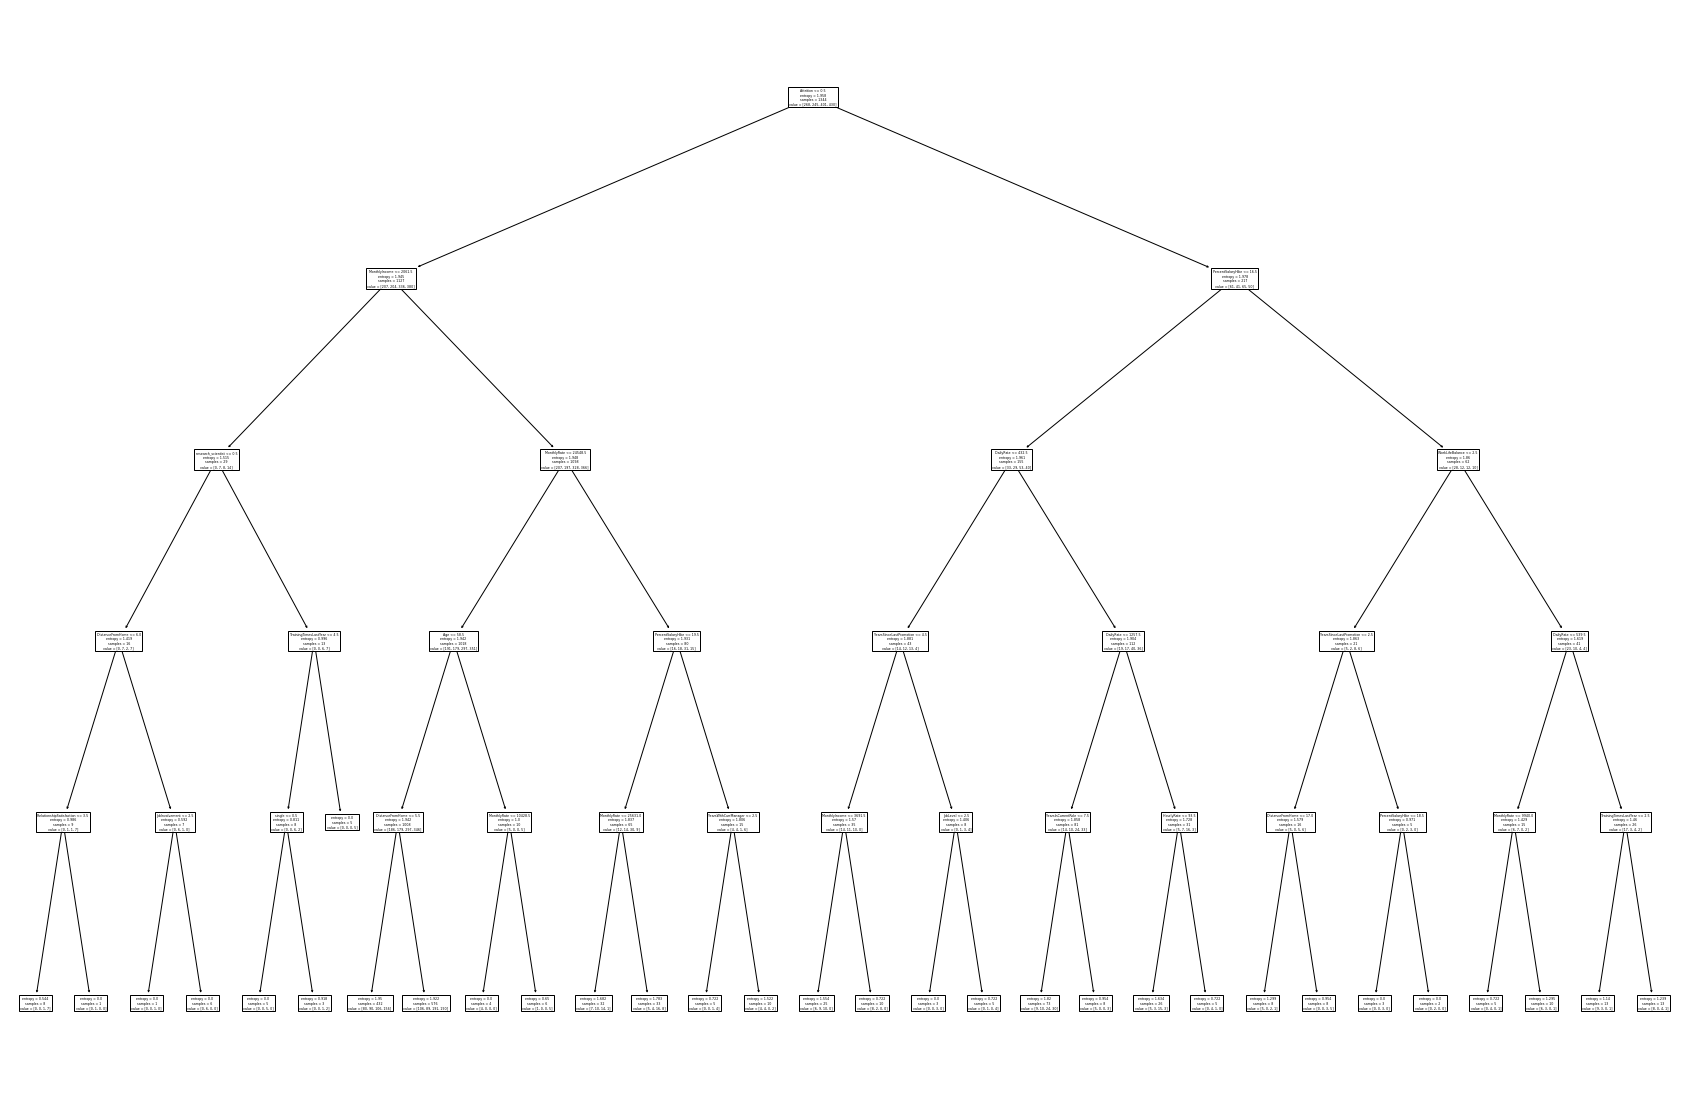

In [ ]:
plt.figure(figsize = (30, 20))
plot_tree(model, feature_names = model.feature_names_in_)
plt.show()

### ****Evaluación del Modelo****

In [ ]:
predictions = model.predict(X_valid)

Posteriormente se evalua en el dataset de validación

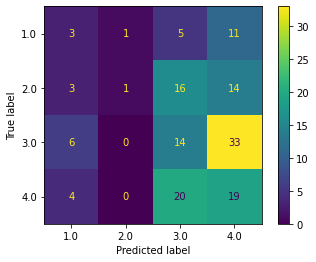

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.24666666666666667
Recall: 0.24666666666666667
F1: 0.2466666666666667


En esta prueba se observa que en este dataset obtuvo pesimas metricas, y que el modelo no esta logrando aprender de los datos. ademas se nota que el modelo tiene una preferencia por escoger las categorias 3 y 4.

## 2. Modelo 2 - Random Forest

Posteriormente se hara otro GridSearch sobre un modelo de random forest con las siguientes variaciones:

| Parametro    | Conjunto                                |
|--------------|-----------------------------------------|
| max_depth    | Numeros del 20 al 25                    |
| criterion    | Gini o Entropy                          |
| class_weight | balanced_subsample, 'balanced'o Ninguno |
| n_estimators | Multiplos de 10 entre 50 y 150          |

In [ ]:
pipeline = Pipeline(steps = [
    ('rf', RandomForestClassifier())
])

parameters = {
    'rf__max_depth':range(20,25), 
    'rf__criterion': ['gini', 'entropy'], 
    'rf__n_estimators': range(50, 150, 10), 
    'rf__class_weight': ['balanced_subsample', 'balanced', None]
}

'''
'scoring' es una lista con las métricas que vamos a usar como referencia para la validación cruzada que se realice.
'refit' hace referencia al score principal que se usará para definir el mejor modelo.
'cv' determina la estrategia de división de validación cruzada (Si es un entero este representa el número de folds).
'''

gridRF = GridSearchCV(pipeline,
                    param_grid = parameters,
                    scoring = ['recall_micro', 'f1_micro'],
                    refit = 'f1_micro',
                    verbose = 4,
                    n_jobs = 100,
                    cv = 3)
gridRF.fit(X, Y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=100,
             param_grid={'rf__class_weight': ['balanced_subsample', 'balanced',
                                              None],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(20, 25),
                         'rf__n_estimators': range(50, 150, 10)},
             refit='f1_micro', scoring=['recall_micro', 'f1_micro'], verbose=4)

In [ ]:
print(f'Con una evaluación de {gridRF.best_score_}, los parámetros del mejor modelo son: \n {gridRF.best_params_}')

Con una evaluación de 0.33407738095238093, los parámetros del mejor modelo son: 
 {'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': 23, 'rf__n_estimators': 140}


El mejor modelo el que balanceo las clases, utilizo un criterio entropy, una profundidad del arbol de 20 y 110 estimadores. Aunque al igual que el anterior este modelo obtuvo malos resultados durante la cross validation.

In [ ]:
gridRF.cv_results_

{'mean_fit_time': array([ 3.64085706,  4.23400076,  5.33013884,  6.39448301, 15.01536512,
        17.36364373, 19.9721237 , 28.18218716, 44.37435667, 47.94970838,
        13.72749241, 18.45357434, 24.29958558, 28.35222387, 32.47868776,
        37.12247841, 40.92869409, 48.21427957, 52.07311201, 56.07263374,
        17.57287312, 21.48236346, 25.22858365, 31.33175866, 38.91762543,
        42.44286243, 45.87565549, 48.99739679, 51.92704487, 55.50471934,
        21.29100696, 25.01458589, 29.82148838, 32.25054193, 33.95873896,
        37.03486975, 41.62296057, 48.28131024, 52.06068722, 55.68637371,
        17.80879768, 21.08910608, 24.1234049 , 29.50348997, 37.48802741,
        41.80029209, 44.85798621, 48.37132875, 51.61324279, 55.35245728,
        31.36213692, 35.95249915, 41.01036334, 45.28455989, 50.5970192 ,
        59.76641043, 67.33940268, 71.76280308, 74.15222859, 79.05781174,
        26.89999437, 30.34289122, 36.68746026, 44.41133094, 50.80546816,
        55.63705897, 60.31683739, 

### ****Evaluación del Modelo****

Luego se hace la validación.

In [ ]:
predictions = gridRF.predict(X_valid)

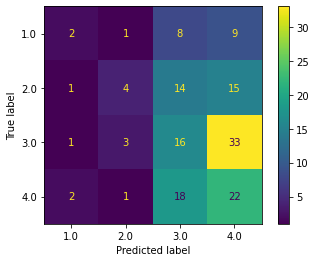

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.29333333333333333
Recall: 0.29333333333333333
F1: 0.29333333333333333


Luego en el dataset de validación se observa que este modelo obtuvo mejores resultados y no solo estaba sobreajustando a los datos como los arboles de decisión, aunque todavia se observa una preferencia a las categorias 3 y 4. A pesar de ser un mejor modelo aun sigue siendo muy ineficiente.

## 3. Modelo 3 DecisionTreeClassifier y PCA

In [ ]:
# Se inicia con el 95% de la varianza
from sklearn.decomposition import PCA

pca_95 = PCA(.95)
pca_95.fit(X)
x_train_PCA_95 = pca_95.transform(X)
x_test_PCA_95 = pca_95.transform(X_valid)

In [ ]:
print(f'Dimensiones de los datos previos a implementar PCA: {X.shape}')
print(f'Dimensiones de los datos posterior a implementar PCA: {x_train_PCA_95.shape}')

Dimensiones de los datos previos a implementar PCA: (1344, 49)
Dimensiones de los datos posterior a implementar PCA: (1344, 2)


In [ ]:
parameters = {'max_depth':range(3,15), 'criterion': ['gini', 'entropy']}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=x_train_PCA_95, y=Y)
model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.3288114980652294 {'criterion': 'gini', 'max_depth': 14}


### ****Evaluación del Modelo****

In [ ]:
predictions = model.predict(x_test_PCA_95)

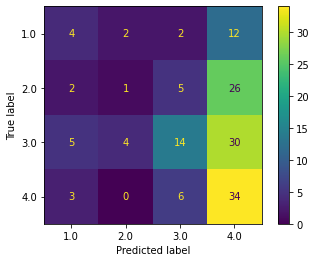

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.35333333333333333
Recall: 0.35333333333333333
F1: 0.35333333333333333


## 4. Modelo 4 Random Forest y PCA

In [ ]:
# Se inicia con el 95% de la varianza
from sklearn.decomposition import PCA

pca_95 = PCA(.95)
pca_95.fit(X)
x_train_PCA_95 = pca_95.transform(X)
x_test_PCA_95 = pca_95.transform(X_valid)

In [ ]:
print(f'Dimensiones de los datos previos a implementar PCA: {X.shape}')
print(f'Dimensiones de los datos posterior a implementar PCA: {x_train_PCA_95.shape}')

Dimensiones de los datos previos a implementar PCA: (1344, 49)
Dimensiones de los datos posterior a implementar PCA: (1344, 2)


In [ ]:
gridRF.fit(x_train_PCA_95, Y)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=100,
             param_grid={'rf__class_weight': ['balanced_subsample', 'balanced',
                                              None],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(20, 25),
                         'rf__n_estimators': range(50, 150, 10)},
             refit='f1_micro', scoring=['recall_micro', 'f1_micro'], verbose=4)

In [ ]:
print(f'Con una evaluación de {gridRF.best_score_}, los parámetros del mejor modelo son: \n {gridRF.best_params_}')

Con una evaluación de 0.32217261904761907, los parámetros del mejor modelo son: 
 {'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 22, 'rf__n_estimators': 140}


El mejor modelo el que balanceo las clases, utilizo un criterio entropy, una profundidad del arbol de 22 y 140 estimadores.


### ****Evaluación del Modelo****

In [ ]:
predictions = gridRF.predict(x_test_PCA_95)

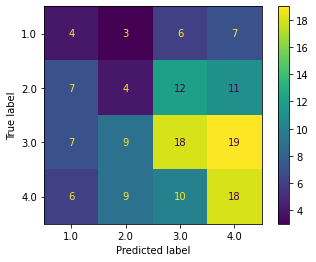

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.29333333333333333
Recall: 0.29333333333333333
F1: 0.29333333333333333


## 5. Modelo 5 - XGBoost

Por ultimo se probara un modelo de arboles acelerado usando XGboost.

In [ ]:
model_xgboost = XGBClassifier(n_estimators=50, max_depth=15, learning_rate=0.1)
model_xgboost.fit(X, Y)
predictions = model_xgboost.predict(X_valid)

### ****Evaluación del Modelo****

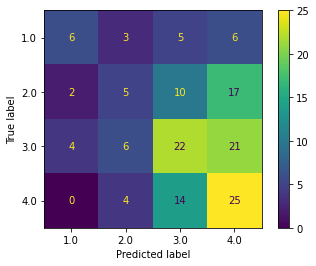

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.38666666666666666
Recall: 0.38666666666666666
F1: 0.38666666666666666


Despues de correr el XGBoost basico, se observo una clara mejora en todas lás meticas, aunque de todas formas prefiere predecir las categorias 3 y 4. Ademas, todavia es un modelo insuficiente

## 6. Modelo 6 - XGBoost & PCA

Debido a la mejora se decide hacer varios experimentos con XGBoost y esta vez incluyendo PCA.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline(steps = [
    ('pca', PCA()),
    ('xgb', XGBClassifier())
])

parameters = {
    'pca__n_components': [1, 0.80, 0.85, 0.90, 0.95, 0.99],
    'xgb__booster': ['gbtree'],
    'xgb__learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
    'xgb__max_depth': [1, 2, 3, 4, 5],
    'xgb__grow_policy': ['depthwise'],
    'xgb__n_estimators': [1, 2, 5, 10],
    'xgb__objective': ['multi:softprob', 'multi:softmax'],
    'xgb__num_class': [1, 2, 3, 4, 5]
}

'''
'scoring' es una lista con las métricas que vamos a usar como referencia para la validación cruzada que se realice.
'refit' hace referencia al score principal que se usará para definir el mejor modelo.
'cv' determina la estrategia de división de validación cruzada (Si es un entero este representa el número de folds).
'''

gridXG = GridSearchCV(pipeline,
                    param_grid = parameters,
                    scoring = ['recall_micro', 'f1_micro'],
                    refit = 'f1_micro',
                    verbose = 4,
                    n_jobs = 100,
                    cv = 3)

In [ ]:
# Iniciar el entrenamiento
gridXG.fit(X, Y)

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('xgb', XGBClassifier())]),
             n_jobs=100,
             param_grid={'pca__n_components': [1, 0.8, 0.85, 0.9, 0.95, 0.99],
                         'xgb__booster': ['gbtree'],
                         'xgb__grow_policy': ['depthwise'],
                         'xgb__learning_rate': [0.1, 0.3, 0.5, 0.7, 1],
                         'xgb__max_depth': [1, 2, 3, 4, 5],
                         'xgb__n_estimators': [1, 2, 5, 10],
                         'xgb__num_class': [1, 2, 3, 4, 5],
                         'xgb__objective': ['multi:softprob', 'multi:softmax']},
             refit='f1_micro', scoring=['recall_micro', 'f1_micro'], verbose=4)

In [ ]:
print(f'Con una evaluación de {gridXG.best_score_}, los parámetros del mejor modelo son: \n {gridXG.best_params_}')

Con una evaluación de 0.3333333333333333, los parámetros del mejor modelo son: 
 {'pca__n_components': 1, 'xgb__booster': 'gbtree', 'xgb__grow_policy': 'depthwise', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__n_estimators': 5, 'xgb__num_class': 1, 'xgb__objective': 'multi:softprob'}


In [ ]:
predictions = gridXG.predict(X_valid)

### ****Evaluación del Modelo****

In [ ]:
print('Precision:', precision_score(Y_valid, predictions, average='micro'))
print('Recall:', recall_score(Y_valid, predictions, average='micro'))
print('F1:', f1_score(Y_valid, predictions, average='micro'))

Precision: 0.31333333333333335
Recall: 0.31333333333333335
F1: 0.31333333333333335


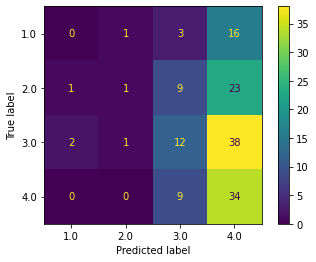

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid, predictions)

Se puede observar que nuestros experimentos no salieron bien y no se logro mejor los resultados del primer modelo de XGBoost.

# **Interpretación**

**¿Son Age y MonthlyIncome features significativas para la estimación del nivel de satisfacción del empleado?**

<BarContainer object of 49 artists>

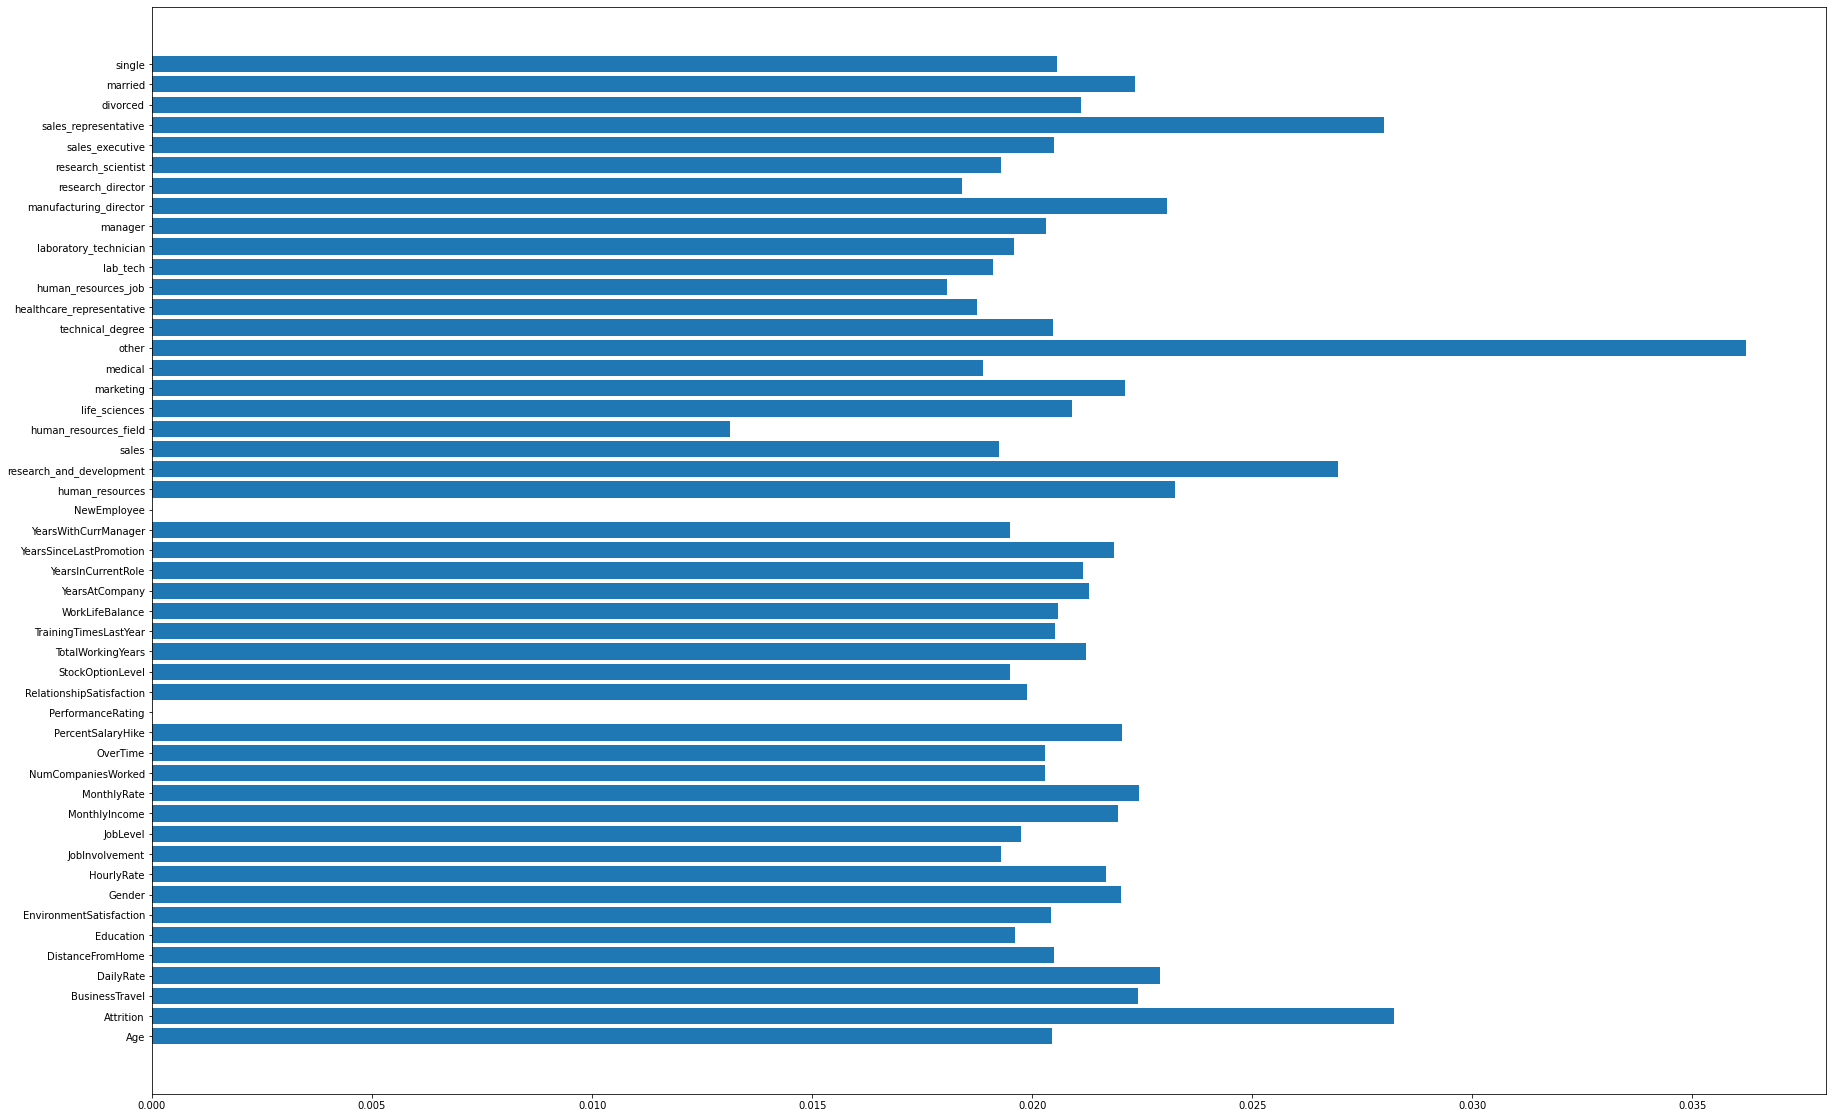

In [ ]:
model_xgboost.feature_importances_
plt.figure(figsize = (30, 20))
plt.barh(features, model_xgboost.feature_importances_)

Según lo que nos arrojo el modelo, Attrition es una de las 3 variables más importantes para predecir la satisfacción. En cuanto a MonthlyIncome y Age estan en un punto intermedio.

**Elija las 3 features más importantes de su modelo e interprete cuales son las
posibles reglas y/o efectos sobre la variable objetivo.**

Las 3 varibles más importante son other, sales_representative y Attrition. En ese orden.

En cuanto other y sales_representative son parte de los OneHotEncoders de el EducationField y el JobRole, respectivamente. Por lo tato, podemos decir que el modelo considera que las personas que estudiaron otras carreras y las personas del area de ventas son más faciles de predecir que el resto.

En cuanto Attrition se puede intepretar que si una persona se encuentra más cansado, va a estar menos satisfecho.

# **Evaluación**

**¿Qué métrica utilizó para escoger el mejor modelo? ¿Por qué?**
Se utilizo precisión, recall, f-score, aunque la principal para escoger lós modelos en cada GridSearch fue f-score debido a que combina la precisión con el recall. No nos fuimos solamente co la presición unicamente porque el dataset estaba desbalanceado.

**Adicional a las métricas de evaluación, ¿por qué lo considera un buen modelo?**
Lastimosamente ni el mejor modelo que obtuvimos, no cumple con los estandares que nos propusimos.

**Defina al menos 3 estrategias concretas para presentarlas al CEO de la
farmacéutica que permitan mejorar el nivel de satisfacción de los empleados y
evitar la fuga de personal.**


1.   Una de las que más afectan la satisfacción es el desgaste, por lo que se debe promover un mejor balance trabajo-vida en los empleados.
2.   Otra razón de insatisfacción es el nivel de educación de los empleados, por lo que es buena idea fomentar la educación.
3.   Tambien se observo que las personas jovenes con salarios bajos, son los que más se desgastan y se debe considerar darles un aumento.



### **Estimación del nivel de satisfacción de nuevos**

En el dataset entregado existen 12 empleados para los cuales se desconoce su nivel de satisfacción (NewEmployee = 1).

In [ ]:
employee_new_predic_df = employee_df_new[features]
predictions = model_xgboost.predict(employee_new_predic_df)

# Aqui se guardan las predicciones para los nuevos empleados
predictions

array([3., 1., 2., 3., 3., 3., 3., 1., 1., 4., 4., 3.])

En cuanto a las predicciones de los nuevos empleados se puede observar que el modelo clasifico al menos a uno en todas las categorias, y que lo que m;as se espera es una satsfacción de 3.

# **Conclusiones**

Durante este taller se hicieron muchas pruebas, lastimosamente apesar de usar las siguientes estrategias:


*   Utilizar varias familias de modelos (DecisionTree, Random Forest y XGBoost)
*   Utilizar GridSearch para variar hiperparametros en cada modelo.
*   Utilizar PCA para bajar la dimensionalidad de las feature.


No se obtuvieron los resultados deseados.

Asumimos que estos problemas son debido a que los features son dificiles de analizar por los modelos probados y a un desbalanceo entre las diferentes categorias.
